In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load the CSV file
df = pd.read_csv('pi_errors.csv')

# Wells to process
wells = ['B11', 'C11', 'D11', 'E11', 'F11', 'G11']

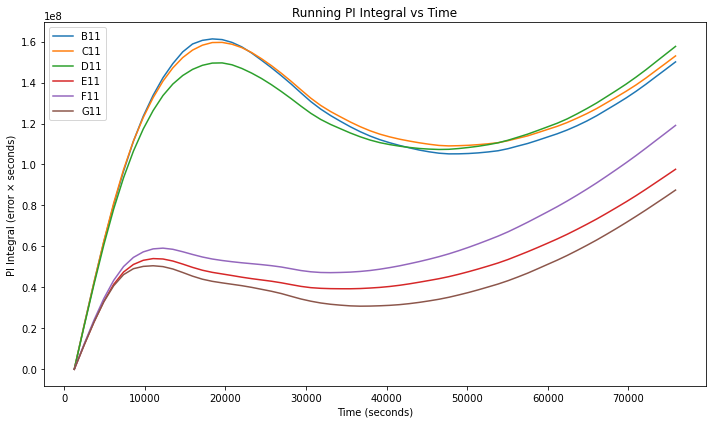

In [10]:
# Prepare the plot
plt.figure(figsize=(10, 6))

for well in wells:
    times = df['time'].values
    errors = df[well].values

    # Compute running integral using the trapezoidal rule
    integral = np.zeros_like(errors)
    for i in range(1, len(errors)):
        dt = times[i] - times[i-1]
        avg_error = 0.5 * (errors[i] + errors[i-1])
        integral[i] = integral[i-1] + avg_error * dt

    plt.plot(times, integral, label=well)

plt.xlabel('Time (seconds)')
plt.ylabel('PI Integral (error × seconds)')
plt.title('Running PI Integral vs Time')
plt.legend()
plt.tight_layout()

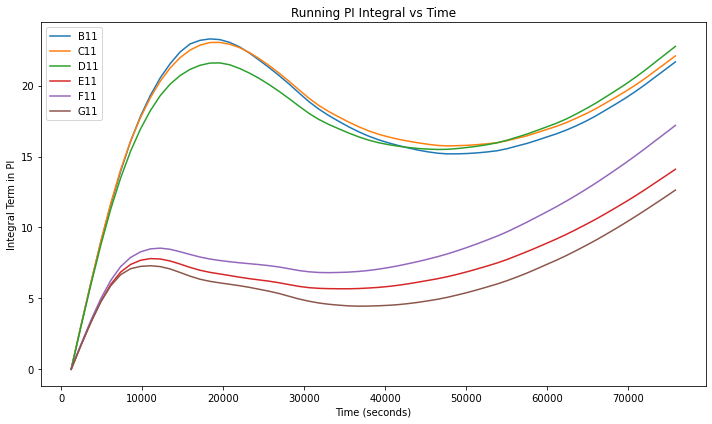

In [15]:
# Prepare the plot
plt.figure(figsize=(10, 6))

for well in wells:
    times = df['time'].values
    errors = df[well].values

    # Compute running integral using the trapezoidal rule
    integral = np.zeros_like(errors)
    integral_term = np.zeros_like(errors)
    for i in range(1, len(errors)):
        dt = times[i] - times[i-1]
        avg_error = 0.5 * (errors[i] + errors[i-1])
        integral[i] = integral[i-1] + avg_error * dt
        integral_term[i] = 0.013 * (1/1500/60) * integral[i]

    plt.plot(times, integral_term, label=well)

plt.xlabel('Time (seconds)')
plt.ylabel('Integral Term in PI')
plt.title('Running PI Integral vs Time')
plt.legend()
plt.tight_layout()

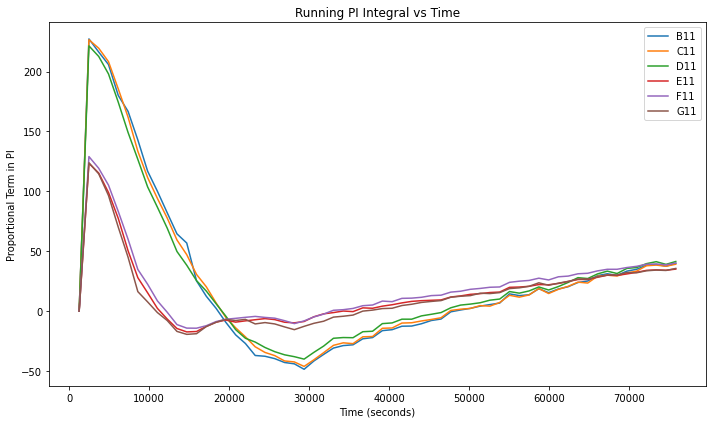

In [18]:
# Prepare the plot
plt.figure(figsize=(10, 6))

for well in wells:
    times = df['time'].values
    errors = df[well].values

    # Compute running integral using the trapezoidal rule
    integral = np.zeros_like(errors)
    prop_term = np.zeros_like(errors)
    for i in range(1, len(errors)):
        dt = times[i] - times[i-1]
        avg_error = 0.5 * (errors[i] + errors[i-1])
        integral[i] = integral[i-1] + avg_error * dt
        prop_term[i] = 0.013 * errors[i]

    plt.plot(times, prop_term, label=well)

plt.xlabel('Time (seconds)')
plt.ylabel('Proportional Term in PI')
plt.title('Running PI Integral vs Time')
plt.legend()
plt.tight_layout()